# STEP-1 Import and Wearhouse Data

In [8]:
# Import all the given datasets and explore shape and size
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
car_attributes_df = pd.read_json('Part1-Car-Attributes.json')
car_attributes_df.head()
car_attributes_df.shape

(398, 8)

In [9]:
# Import all the given datasets and explore shape and size
car_names=pd.read_csv('Part1 - Car name.csv')
car_names.head()
type(car_names)
car_names.shape

(398, 1)

In [10]:
# Merge all datasets onto one and explore the final shape and size
data_concatenated=pd.concat([car_attributes_df,car_names], axis =1, join='outer')
data_concatenated.head(100)
data_concatenated.shape

(398, 9)

In [11]:
# Explore the final dataset and store it on local machine in .csv, .xlsx and .json format
#for future use

data_concatenated.to_json('data_concat.json', orient = 'split',compression='infer',index = 'true')
data_concatenated.to_csv('data_concat.csv', compression='infer',index = 'true')
data_concatenated.to_excel('data_concat.xlsx', index = 'true')
data= data_concatenated
#df = pd.read_csv('data_concat.csv',  compression = 'infer') 
#print(df)

# STEP -2 DATA CLEANSING

In [12]:
# Step-2a - Missing /incorrect Value treatment
data_concatenated.profile_report()

In [13]:
# from the report it looks like there are no missing values, but let us double 
# check and make sure by using isnull() command
data.isnull().sum()

# as we can see from below there are no missing values here.
# But for some reason these cannot be trusted and we will find out int he next steps
# that there are indeed missing values in the form of question marks and they need to be identified.

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

In [14]:
# Step-2b - Drop attributes if required using relevant functional knowledge
# based on the detailed report and also based on Functional knowledge of engines
# it is quite obvious that as weight of the automobile increases , the diaplcement 
# stroke of the engine also has to increase and hence there is definitely a correlation
# between these 2 variables and hence one of them can be dropped.
# Number of Cylinders is also correlated with dispalcement which is again obvious 
# as the number of cylinders go up so does displacement.
# so we can chose to drop weight and cylinders and keep dispalcement.
# we will also prove the above findings using correlation plots

In [15]:
# We will identify the rows which do not have digits and list them out.
hpIsDigit = pd.DataFrame(data.hp.str.isdigit()) 
data[hpIsDigit['hp'] == False]

mpg  cyl   disp hp    wt   acc  yr  origin              car_name
32   25.0    4   98.0  ?  2046  19.0  71       1            ford pinto
126  21.0    6  200.0  ?  2875  17.0  74       1         ford maverick
330  40.9    4   85.0  ?  1835  17.3  80       2  renault lecar deluxe
336  23.6    4  140.0  ?  2905  14.3  80       1    ford mustang cobra
354  34.5    4  100.0  ?  2320  15.8  81       2           renault 18i
374  23.0    4  151.0  ?  3035  20.5  82       1        amc concord dl

In [16]:
data=data.drop(['car_name'],axis=1)
data=data.drop(['origin'],axis=1)
data.head()

mpg  cyl   disp   hp    wt   acc  yr
0  18.0    8  307.0  130  3504  12.0  70
1  15.0    8  350.0  165  3693  11.5  70
2  18.0    8  318.0  150  3436  11.0  70
3  16.0    8  304.0  150  3433  12.0  70
4  17.0    8  302.0  140  3449  10.5  70

In [17]:
# As can be seen there are missing valuesin hp and these can be replaced with mean
# or median and hence they are being replced here
Cdata= data.replace('?',np.nan)
Cdata[hpIsDigit['hp']==False]

mpg  cyl   disp  hp    wt   acc  yr
32   25.0    4   98.0 NaN  2046  19.0  71
126  21.0    6  200.0 NaN  2875  17.0  74
330  40.9    4   85.0 NaN  1835  17.3  80
336  23.6    4  140.0 NaN  2905  14.3  80
354  34.5    4  100.0 NaN  2320  15.8  81
374  23.0    4  151.0 NaN  3035  20.5  82

In [18]:
# LEt us find the median of the data
Cdata.median()

mpg       23.0
cyl        4.0
disp     148.5
hp        93.5
wt      2803.5
acc       15.5
yr        76.0
dtype: float64

In [95]:
medianFiller = lambda x: x.fillna(x.median())
Cdata = Cdata.apply(medianFiller,axis=0)

Cdata['hp'] = Cdata['hp'].astype('float64')  # converting the hp column from object / string type to float
print(Cdata.loc[[330]])

      mpg  cyl  disp    hp    wt   acc  yr
330  40.9    4  85.0  93.5  1835  17.3  80


# Step -3 Data Analysis and Visualization

In [20]:
# Perform detailed statistical analsysis on the data

In [21]:
Cdata.describe()
# As can be seen, there is some skewness in the data in some variables where
# the mean of the variable is different from the median in certain variables
# such as disp & weight.The pairplot will tell us more information

mpg         cyl        disp          hp           wt  \
count  398.000000  398.000000  398.000000  398.000000   398.000000   
mean    23.514573    5.454774  193.425879  104.304020  2970.424623   
std      7.815984    1.701004  104.269838   38.222625   846.841774   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.500000    4.000000  104.250000   76.000000  2223.750000   
50%     23.000000    4.000000  148.500000   93.500000  2803.500000   
75%     29.000000    8.000000  262.000000  125.000000  3608.000000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc          yr  
count  398.000000  398.000000  
mean    15.568090   76.010050  
std      2.757689    3.697627  
min      8.000000   70.000000  
25%     13.825000   73.000000  
50%     15.500000   76.000000  
75%     17.175000   79.000000  
max     24.800000   82.000000

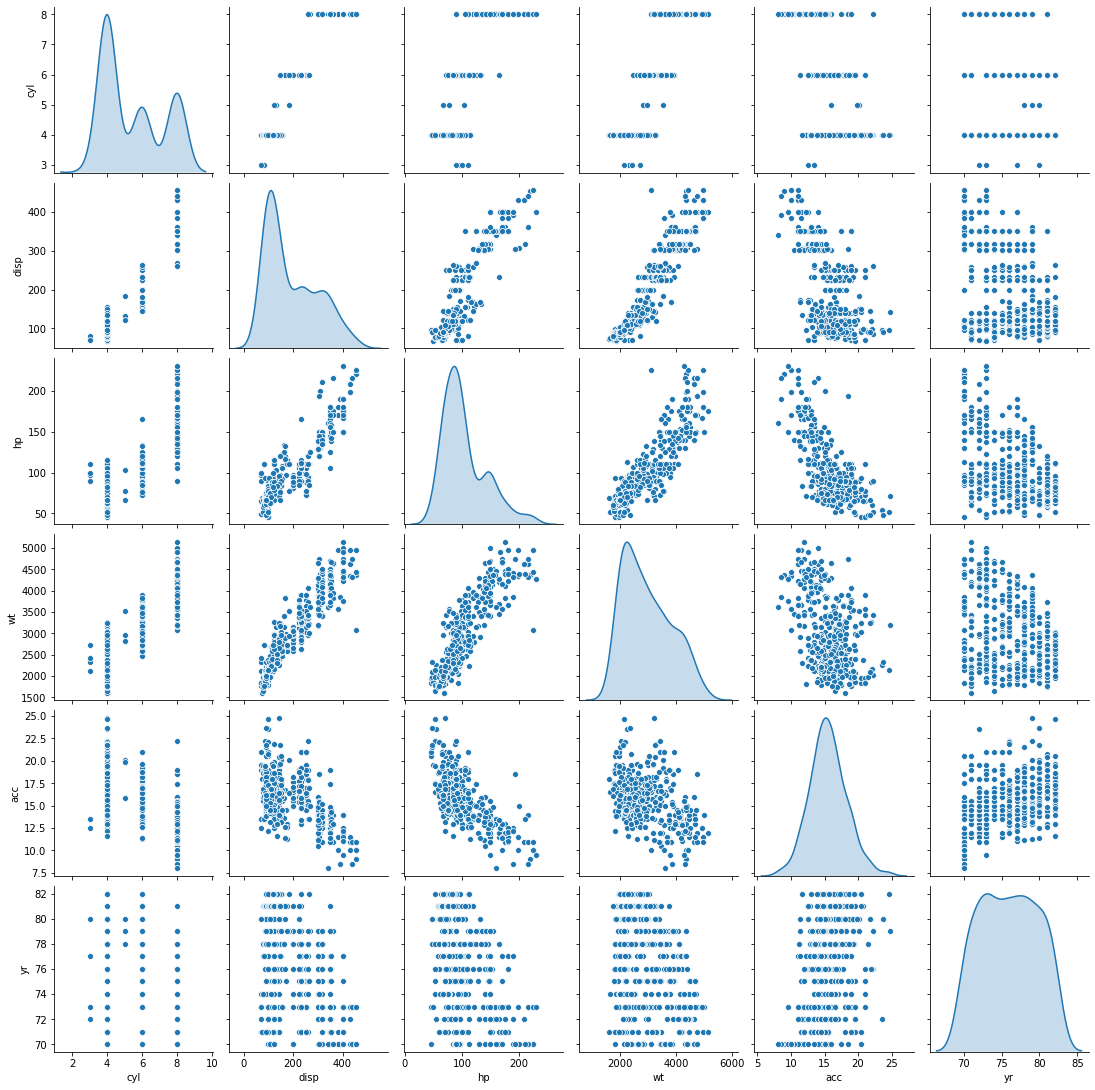

In [22]:
# Bi-variate plots
# Let us drop the independent variable mpg
CdataX = Cdata.drop(['mpg'],axis=1)
CdataY= Cdata[['mpg']]
sns.pairplot(CdataX, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [23]:
#Cdata[['disp']].skew()
#Cdata_log=np.log(Cdata['disp'])
#Cdata_log.skew()
#type(Cdata_log)
#Cdata['disp-Log']=Cdata_log
#Cdata
#sns.pairplot(Cdata, diag_kind='kde')

In [24]:
# Comments after Pair plot
# As can be seen from the pairplots there are linear correlations between different
# varibles such as displacement and hp , disp and cylinder and disp and weight
# taking in to account all these correlated variables may be detrimental to the analysis
# let us also now look at the correlation matrix
CdataX.corr()
# As can be seen below disp vs cyl , disp vs wt, disp vs hp as well have high 
# correlaitons

cyl      disp        hp        wt       acc        yr
cyl   1.000000  0.950721  0.841284  0.896017 -0.505419 -0.348746
disp  0.950721  1.000000  0.895778  0.932824 -0.543684 -0.370164
hp    0.841284  0.895778  1.000000  0.862442 -0.686590 -0.413733
wt    0.896017  0.932824  0.862442  1.000000 -0.417457 -0.306564
acc  -0.505419 -0.543684 -0.686590 -0.417457  1.000000  0.288137
yr   -0.348746 -0.370164 -0.413733 -0.306564  0.288137  1.000000

In [25]:
def plot_corr(df, size=20):
    corr=df.corr()
    fig, ax= plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)

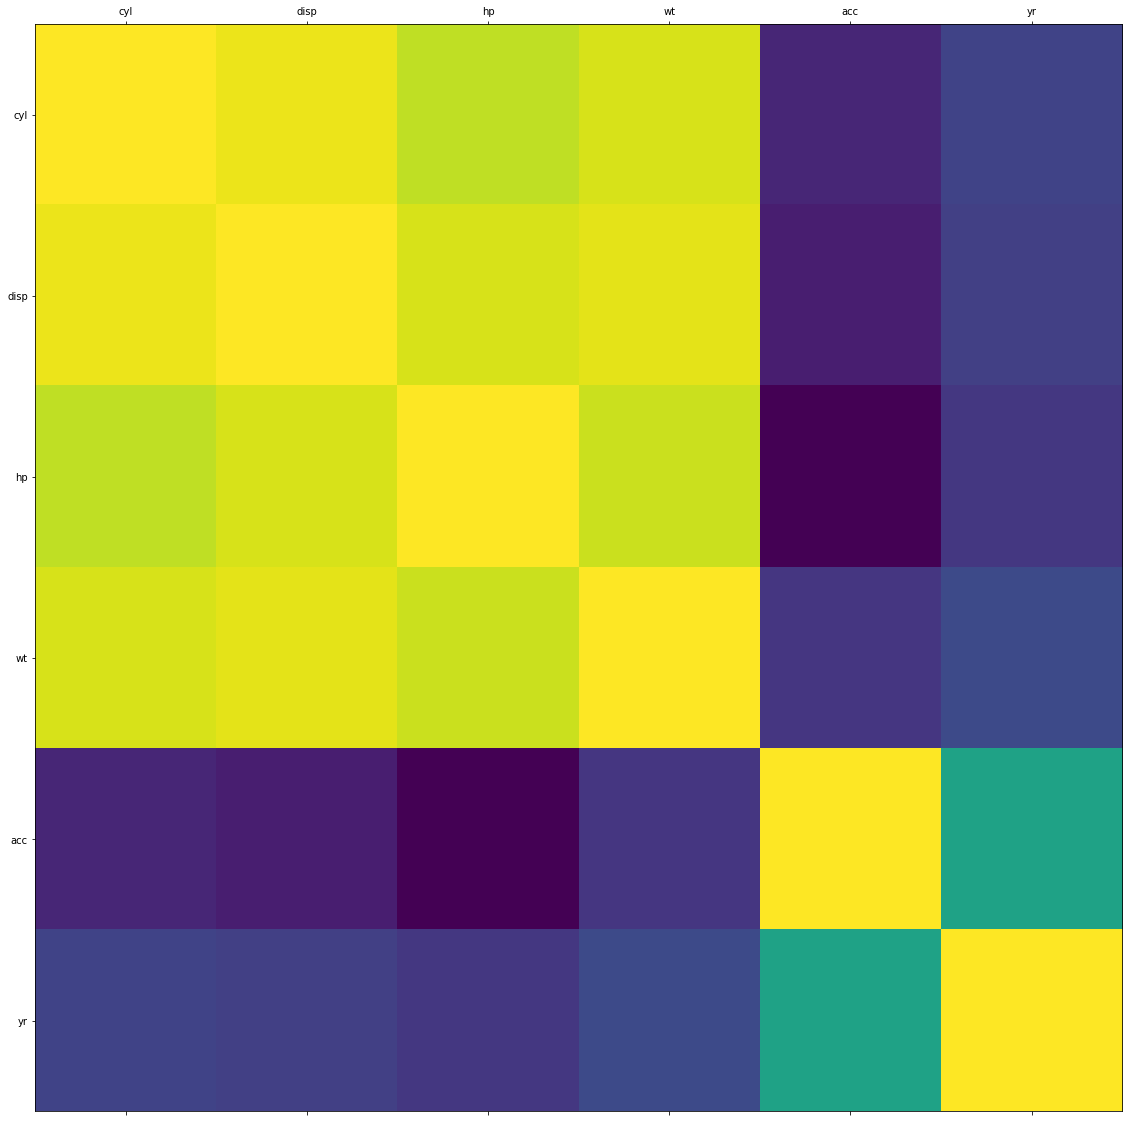

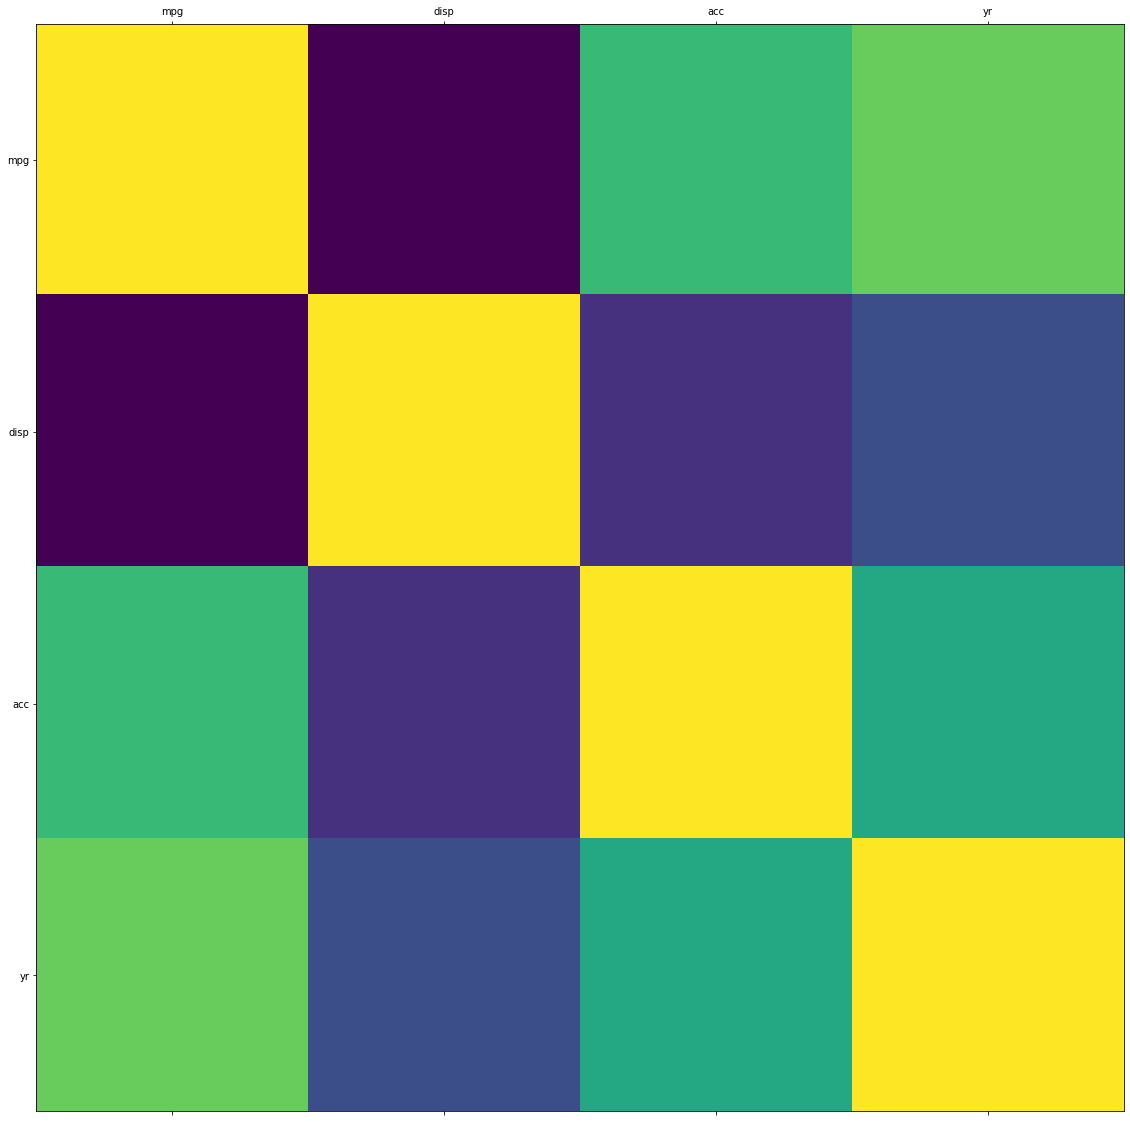

In [26]:
plot_corr(CdataX)
# So based on these plots we can chose to drop cyl, wt & hp as well
# now let us also perform PCA to assess how many variables actually need to
# be dropped.
CdataXDrop = Cdata.drop(['cyl','wt','hp'],axis=1)
plot_corr(CdataXDrop)
# CdataXdrop represents a more cleaner and better version of input variables than
# Cdrop

cyl      disp        hp        wt       acc        yr
0  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426
1  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426
2  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426
3  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426
4  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426

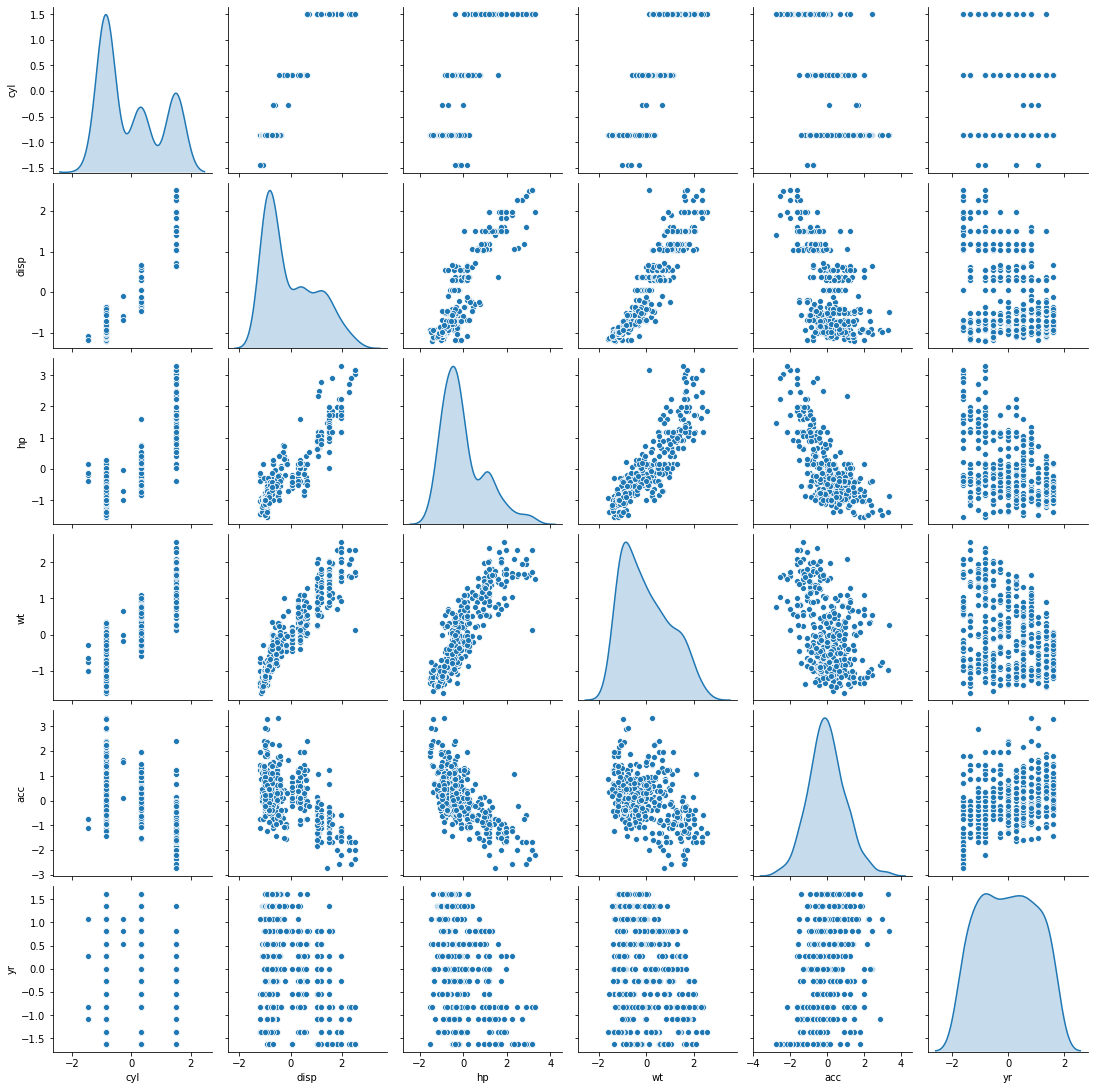

In [27]:
#STANDARD SCALING PROCESS
# WE WILL TRY TO SCALE BOTH BY Z SCORE TECHNIQUE AND 
# STANDARD SCALER TECHNIQUE AND COMPARE THE REsults
# STANDARD SCALER TECHNIQUE
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()
scaled_CdataX=scaler.fit_transform(CdataX)
#sns.pairplot(scaled_CdataX,diag_kind='kde')
scaled_CdataX_df= pd.DataFrame(scaled_CdataX)
scaled_CdataX_df.columns=['cyl','disp','hp','wt','acc','yr']
sns.pairplot(scaled_CdataX_df, diag_kind='kde') 
scaled_CdataX_df.head()
#CdataX.head()

In [28]:
# Z-SCORE SCALER TECHNIQUE
from scipy.stats import zscore
scaled_CdataX_Zscore=CdataX.apply(zscore)
scaled_CdataX_Zscore.head()
# So we can see that both z score and standard scaler techniques have the 
# same results

cyl      disp        hp        wt       acc        yr
0  1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426
1  1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426
2  1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426
3  1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426
4  1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426

# PCA ANALYSIS

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca.fit(scaled_CdataX_df)

PCA(n_components=6)

In [30]:
# The eigen values
print(pca.explained_variance_)


[4.26378678 0.84068225 0.67499578 0.13552589 0.06386533 0.03625731]


In [31]:
# The eigen vectors
print(pca.components_)

[[ 0.45509041  0.46913807  0.46318283  0.44618821 -0.32466834 -0.23188446]
 [ 0.18276349  0.16077095  0.0139189   0.25676595  0.21039209  0.9112425 ]
 [ 0.17104591  0.13443134 -0.12440857  0.27156481  0.86752316 -0.33294164]
 [-0.65709523 -0.18742114  0.62819714  0.33868744  0.15214558  0.02469974]
 [ 0.28804531 -0.00141408  0.60418441 -0.68887559  0.27061128  0.06487726]
 [-0.46420823  0.83717483 -0.10059817 -0.26829299  0.0367486   0.01405118]]


In [32]:
#Now we can also graphically plot the percentage variation explained by 
# each variable
print(pca.explained_variance_ratio_)

[0.70884563 0.13976166 0.11221664 0.0225309  0.01061748 0.0060277 ]


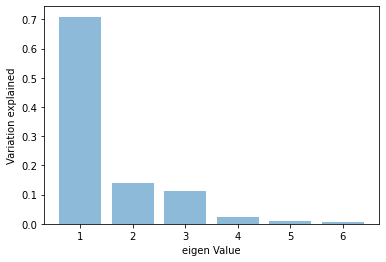

In [33]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()
# The graph below again shows that the majority of the variation are
# expalined by the first 3 variables and they can be used to expalin the 
# majority of the variation, this will also lead to reduciton in computation time.


In [34]:
# Dimensionality Reduction
pca3 = PCA (n_components=3)
pca3.fit(scaled_CdataX_df)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(scaled_CdataX_df)

[[ 0.45509041  0.46913807  0.46318283  0.44618821 -0.32466834 -0.23188446]
 [ 0.18276349  0.16077095  0.0139189   0.25676595  0.21039209  0.9112425 ]
 [ 0.17104591  0.13443134 -0.12440857  0.27156481  0.86752316 -0.33294164]]
[0.70884563 0.13976166 0.11221664]


In [35]:
pd.DataFrame(Xpca3)
print(Xpca3)

[[ 2.58470158 -1.13503558 -0.09158558]
 [ 3.36172518 -1.03670689 -0.24694524]
 [ 2.95892839 -1.20779415 -0.47937758]
 ...
 [-1.16393463  0.71574676 -2.16248162]
 [-1.94324569  1.32567228  0.14526268]
 [-1.95553788  1.41517409  0.41668135]]


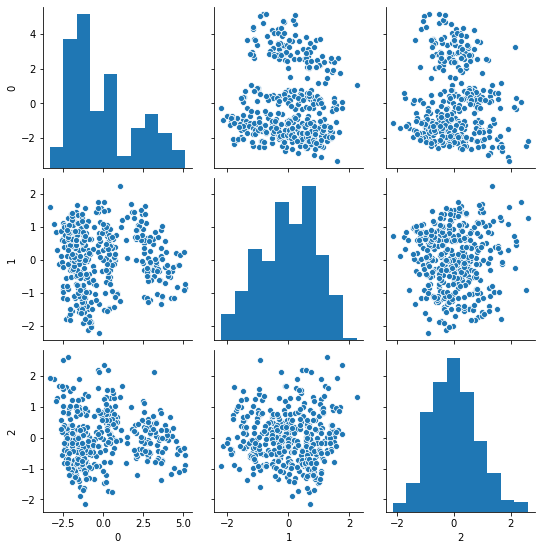

In [36]:
sns.pairplot(pd.DataFrame(Xpca3))

# STEP 4 - MACHINE LEARNING APPLICATION

In [37]:
# USE K- MEANS TO FIND OUT THE OPTIMAL NUMBER OF CLUSTERS IN THE DATA
# TO find the optimal number of clusters using K-means we will have to use 
# Knee test to see where the distortion decreases the most
from sklearn.cluster import KMeans

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

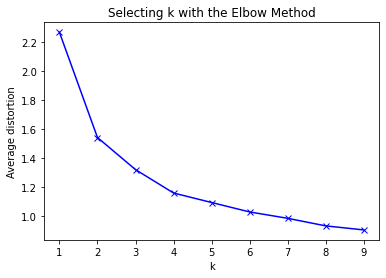

In [38]:
#Finding optimal no. of clusters in the Scaled Data
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(scaled_CdataX_df)
    prediction=model.predict(scaled_CdataX_df)
    meanDistortions.append(sum(np.min(cdist(scaled_CdataX_df, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_CdataX_df.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

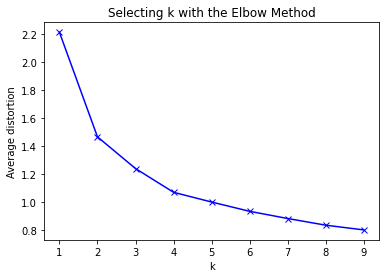

In [39]:
#Finding optimal no. of clusters in the PCA data
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Xpca3)
    prediction=model.predict(Xpca3)
    meanDistortions.append(sum(np.min(cdist(Xpca3, model.cluster_centers_, 'euclidean'), axis=1)) / Xpca3.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [40]:
# we can see that even the PCA data the results are same as the scaled data with 6 variables
# We can see that the elbow is occuring at 3 & 4 clusters

In [77]:
# Let us first start with K = 3
final_model_Kmeans=KMeans(3)
final_model_Kmeans.fit(scaled_CdataX_df)
prediction=final_model_Kmeans.predict(scaled_CdataX_df)

#Append the prediction 
CdataX["GROUP"] = prediction
scaled_CdataX_df_3 = scaled_CdataX_df
scaled_CdataX_df_3["GROUP"] = prediction
print("Groups Assigned : \n")
scaled_CdataX_df_3.head(399)

Groups Assigned : 



cyl      disp        hp        wt       acc        yr  GROUP
0    1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426      1
1    1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426      1
2    1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426      1
3    1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426      1
4    1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426      1
..        ...       ...       ...       ...       ...       ...    ...
393 -0.856321 -0.513026 -0.479482 -0.213324  0.011586  1.621983      0
394 -0.856321 -0.925936 -1.370127 -0.993671  3.279296  1.621983      0
395 -0.856321 -0.561039 -0.531873 -0.798585 -1.440730  1.621983      0
396 -0.856321 -0.705077 -0.662850 -0.408411  1.100822  1.621983      0
397 -0.856321 -0.714680 -0.584264 -0.296088  1.391285  1.621983      0

[398 rows x 7 columns]

In [42]:
s=[]
for i in range(398): 
    s.append(i)

len(s)

398

In [43]:
#scaled_CdataX_df["S.No"] = s
#scaled_CdataX_df.head()

In [44]:
#scaled_CdataX_df.plot.scatter(x = 'S.No', y = 'GROUP')
#facet = sns.lmplot(data=scaled_CdataX_df, x='cyl', y='acc', hue='GROUP', 
                   #fit_reg=False, legend=True, legend_out=True)

In [45]:
# ANALYZE THE DISTRIBUTION OF THE DATA AMONG THE 3 GROUPS (k=3). 
techSuppClust = CdataX.groupby(['GROUP'])
techSuppClust.mean()
techSuppClust.count()

cyl  disp   hp   wt  acc   yr
GROUP                               
0       93    93   93   93   93   93
1      210   210  210  210  210  210
2       95    95   95   95   95   95

In [46]:
# So As we can see there are approximately 95 automobiles in group 0, 210 automobiles in 
# group 1 and 93 automobiles in Group 2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E166F8280>,
      dtype=object)

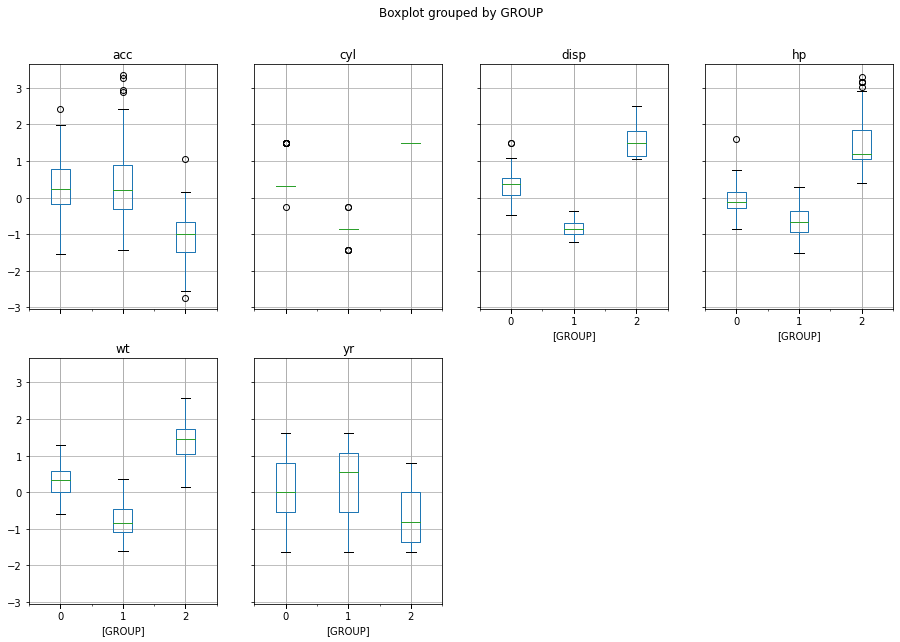

In [47]:
scaled_CdataX_df.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [78]:
# Let us first start with K = 4
final_model_Kmeans4=KMeans(4)
final_model_Kmeans4.fit(scaled_CdataX_df)
prediction=final_model_Kmeans4.predict(scaled_CdataX_df)

#Append the prediction 
CdataX["GROUP"] = prediction
scaled_CdataX_df_4=scaled_CdataX_df
scaled_CdataX_df_4["GROUP"] = prediction
print("Groups Assigned : \n")
scaled_CdataX_df_4.head(399)

Groups Assigned : 



cyl      disp        hp        wt       acc        yr  GROUP
0    1.498191  1.090604  0.673118  0.630870 -1.295498 -1.627426      1
1    1.498191  1.503514  1.589958  0.854333 -1.477038 -1.627426      1
2    1.498191  1.196232  1.197027  0.550470 -1.658577 -1.627426      1
3    1.498191  1.061796  1.197027  0.546923 -1.295498 -1.627426      1
4    1.498191  1.042591  0.935072  0.565841 -1.840117 -1.627426      1
..        ...       ...       ...       ...       ...       ...    ...
393 -0.856321 -0.513026 -0.479482 -0.213324  0.011586  1.621983      0
394 -0.856321 -0.925936 -1.370127 -0.993671  3.279296  1.621983      0
395 -0.856321 -0.561039 -0.531873 -0.798585 -1.440730  1.621983      0
396 -0.856321 -0.705077 -0.662850 -0.408411  1.100822  1.621983      0
397 -0.856321 -0.714680 -0.584264 -0.296088  1.391285  1.621983      0

[398 rows x 7 columns]

In [49]:
# ANALYZE THE DISTRIBUTION OF THE DATA AMONG THE 4 GROUPS (k=4). 
techSuppClust4 = CdataX.groupby(['GROUP'])
techSuppClust4.mean()
#techSuppClust4.count()

cyl        disp          hp           wt        acc         yr
GROUP                                                                     
0      4.000000  111.925620   77.851240  2340.322314  16.508264  79.867769
1      8.000000  349.705263  162.105263  4154.526316  12.604211  73.526316
2      6.161290  223.881720  102.155914  3239.967742  16.378495  76.172043
3      3.977528  105.589888   80.814607  2281.494382  16.606742  73.247191

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E1A5D5580>,
      dtype=object)

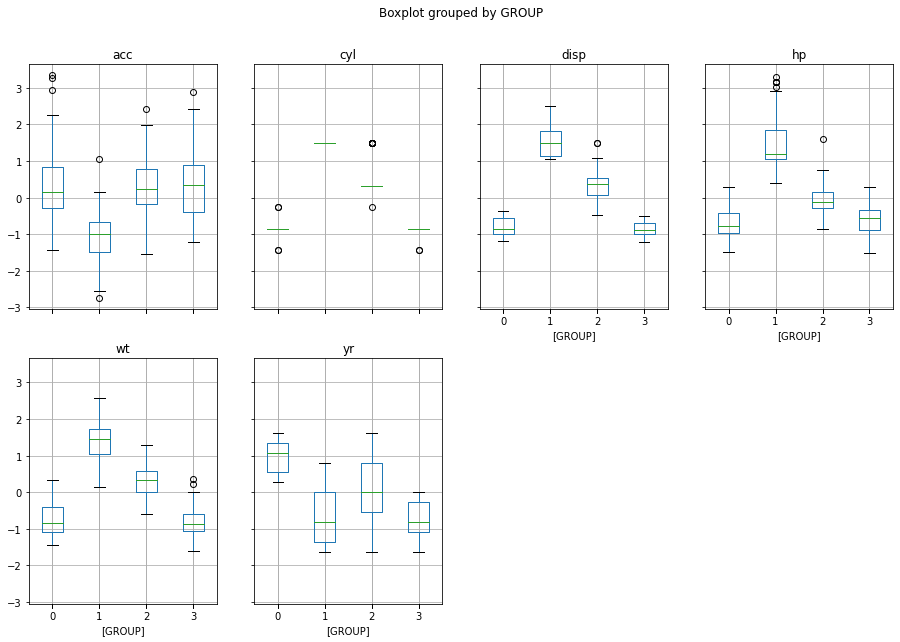

In [50]:
scaled_CdataX_df.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [51]:
# As can be seen both the box plots show quite a few variations between the 2 different 
# groups

# Heirarchial clustering

In [52]:
from sklearn.cluster import AgglomerativeClustering

In [64]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',  linkage='average')

In [65]:
scaled_CdataX_df_Agg = scaled_CdataX_df.drop(['GROUP'],axis=1)
model.fit(scaled_CdataX_df_Agg)

AgglomerativeClustering(linkage='average', n_clusters=5)

In [66]:
scaled_CdataX_df_Agg['labels']=model.labels_
CdataX['labels']=model.labels_
scaled_CdataX_df.head(100)
CdataX.head(100)

cyl   disp     hp    wt   acc  yr  GROUP  labels
0     8  307.0  130.0  3504  12.0  70      1       0
1     8  350.0  165.0  3693  11.5  70      1       0
2     8  318.0  150.0  3436  11.0  70      1       0
3     8  304.0  150.0  3433  12.0  70      1       0
4     8  302.0  140.0  3449  10.5  70      1       0
..  ...    ...    ...   ...   ...  ..    ...     ...
95    8  455.0  225.0  4951  11.0  73      1       0
96    8  360.0  175.0  3821  11.0  73      1       0
97    6  225.0  105.0  3121  16.5  73      2       1
98    6  250.0  100.0  3278  18.0  73      2       1
99    6  232.0  100.0  2945  16.0  73      2       1

[100 rows x 8 columns]

In [67]:
techSuppAGGClust = CdataX.groupby(['labels'])
techSuppAGGClust.mean()
#techSuppAGGClust.count()

cyl        disp          hp           wt        acc         yr  \
labels                                                                        
0       8.000000  346.626263  160.353535  4128.393939  12.694949  73.696970   
1       6.000000  219.024096  101.716867  3198.686747  16.222892  75.867470   
2       4.000000  112.000000   64.750000  2731.250000  23.750000  79.250000   
3       4.004808  109.713942   79.358173  2317.293269  16.443269  77.048077   
4       8.000000  305.000000  107.500000  3776.250000  19.400000  79.000000   

           GROUP  
labels            
0       1.040404  
1       2.000000  
2       0.750000  
3       1.288462  
4       2.000000

In [68]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [69]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [70]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(scaled_CdataX_df_Agg, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(scaled_CdataX_df_Agg))

c

0.8462864310001251

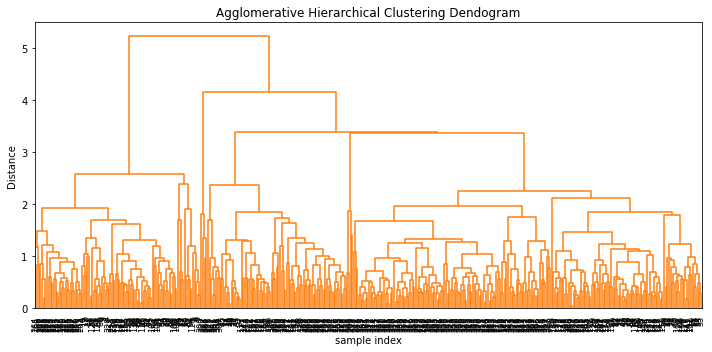

In [71]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [72]:
# INSIGHTS ABOUT THE DIFFERENCE IN USING THESE METHODS.
# It is to be noted that we need not know the number of the clusters before in hand
# for the hierarchial clustering and that the model is evaluated using the
# distance, the model is evaluated using the distance correlation measure here 
# the distance c which is 0.82 using 3 clusters and o.84 using 5 clusters.
# In the k means example however it is important to evlaute the optimum number of 
# clusters using the knee method and finding the elbow where the turn occurs 
# and then using those number of clusters.

# STEP 5 - OUTCOMES BASED ON USING THE ML METHODS

In [73]:
# FOR THE K MEANS THE ELBOW OCCURS AT BOTH 3 AND 4 CLUSTERS BUT ON THE BASIS OF THE
# BOX PLOT WE CAN SEE THAT THE DIFFERENT CLUSTERS HAVE SIGNIFICANT VARIATIONS.
# EVEN THE 4 CLUSTER PLOT SHOWS A LOT OF VARIATIONS BUT KEEPING IN MIND
# COMPUTATION TIME 3 CLUSTERS SHOULD BE ENOUGH.

In [74]:
#LINEAR REGRESSION MODELS on 3 clusters and 4 clusters
# so what we are doing here is treating the clusters as the Y variable
# and other variables as the independent varibles.

In [86]:
from sklearn.linear_model import LinearRegression
regression_model_3=LinearRegression()
scaled_CdataX_df_3d=scaled_CdataX_df_3.drop(['GROUP'],axis=1)
scaled_CdataY_df_3 = scaled_CdataX_df_3[['GROUP']]
regression_model_3.fit(scaled_CdataX_df_3d,scaled_CdataY_df_3)
regression_model_3.score(scaled_CdataX_df_3d,scaled_CdataY_df_3)


0.5210219962445561

In [90]:
from sklearn.linear_model import LinearRegression
regression_model_4=LinearRegression()
scaled_CdataX_df_4d=scaled_CdataX_df_4.drop(['GROUP'],axis=1)
scaled_CdataY_df_4 = scaled_CdataX_df_4[['GROUP']]
regression_model_4.fit(scaled_CdataX_df_4d,scaled_CdataY_df_4)
regression_model_4.score(scaled_CdataX_df_4d,scaled_CdataY_df_4)

0.5210219962445561

In [93]:
from sklearn.linear_model import LinearRegression
regression_model_Original=LinearRegression()
regression_model_Original.fit(CdataX,CdataY)
regression_model_Original.score(CdataX,CdataY)


0.8374446636376142

In [94]:
from sklearn.linear_model import LinearRegression
regression_model_Original=LinearRegression()
regression_model_Original.fit(Xpca3,CdataY)
regression_model_Original.score(Xpca3,CdataY)

0.7799909620572006

In [89]:
# No difference when wer are looking at the number of clusters as the Y variable
#but when we fit the mpg as the independent variable we see that using PCA varibales is able to explain
# the most of the variation.

# IMPROVISATION

In [ ]:
# THE COMPANY HAS COLLECTED DATA WITH SO MANY VARIABLES THAT ARE INTERENPENDENT ON EACH OTHER
# AS IN THE VARIABLES ARE CORRELATED WITH EACH OTHER.
# THE DATA COULD HAVE FOR EXAMPLE INCLUDED SOME MORE VARIABLES SUCH AS 
# NUMBER FO TYRES, AVERAGE SPEED OF THE AUTOMOBILE ETC WOULD HAVE DETERMINED THE
# MPG BETTER.